In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_dir = '/content/drive/MyDrive/Dataset_ML'
img_height, img_width = 64, 64

In [21]:
categories = ['Cut Shot', 'Cover Drive', 'Straight Drive', 'Pull Shot', 'Leg Glance Shot', 'Scoop Shot']


In [4]:

# Function to load images and labels from the dataset folder
def load_images_and_labels(dataset_dir):
    images = []
    labels = []
    class_names = os.listdir(dataset_dir)  # Get all the folder names (class labels)

    for class_name in class_names:
        class_path = os.path.join(dataset_dir, class_name)

        if os.path.isdir(class_path):
            # Iterate through each image in the folder
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)

                # Load the image as grayscale
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:
                    # Resize to a consistent shape (for example, 64x64)
                    img_resized = cv2.resize(img, (64, 64))
                    images.append(img_resized.flatten())  # Flatten the image into a 1D vector
                    labels.append(class_name)

    return np.array(images), np.array(labels)


In [5]:
# Load images and labels
X, y = load_images_and_labels(dataset_dir)

# Normalize pixel values to the range [0, 1]
X = X / 255.0

In [6]:
# Encode the labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [8]:
# Optional: Reduce dimensionality using PCA (for faster training and better performance)
pca = PCA(n_components=50)  # You can experiment with the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn = KNeighborsClassifier()

In [9]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [ 7 ,6, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree'],  # Algorithm options
    'leaf_size': [5,10,15, 20],                  # Leaf size for tree-based algorithms
    'p': [1, 2]                                 # Distance metrics (1: Manhattan, 2: Euclidean)
}

In [10]:

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=2, verbose=1, n_jobs=-1)

# Train the model with grid search
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters and the best model
best_knn_model = grid_search.best_estimator_

Fitting 2 folds for each of 96 candidates, totalling 192 fits


In [11]:

# Predict on the test set using the best model
y_pred = best_knn_model.predict(X_test_pca)


In [12]:

# Evaluate the model
accuracy = best_knn_model.score(X_test_pca, y_test)
print(f"Best KNN Model Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display the best hyperparameters
print("\nBest Hyperparameters:")
print(grid_search.best_params_)

Best KNN Model Accuracy: 0.7435

Classification Report:
                    precision    recall  f1-score   support

       0. Cut Shot       0.82      0.65      0.73       129
    1. Cover Drive       0.65      0.73      0.69       120
 2. Straight Drive       0.78      0.78      0.78       120
      3. Pull Shot       0.71      0.68      0.69       120
4. Leg Glance Shot       0.72      0.87      0.78       120
     5. Scoop Shot       0.82      0.76      0.79       120

          accuracy                           0.74       729
         macro avg       0.75      0.74      0.74       729
      weighted avg       0.75      0.74      0.74       729


Confusion Matrix:
[[ 84  15   4  13   9   4]
 [  1  88  11   8  10   2]
 [  4  11  93   4   2   6]
 [  7  11   6  82   8   6]
 [  4   3   5   2 104   2]
 [  2   8   0   7  12  91]]

Best Hyperparameters:
{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}



Confusion Matrix:
[[ 84  15   4  13   9   4]
 [  1  88  11   8  10   2]
 [  4  11  93   4   2   6]
 [  7  11   6  82   8   6]
 [  4   3   5   2 104   2]
 [  2   8   0   7  12  91]]


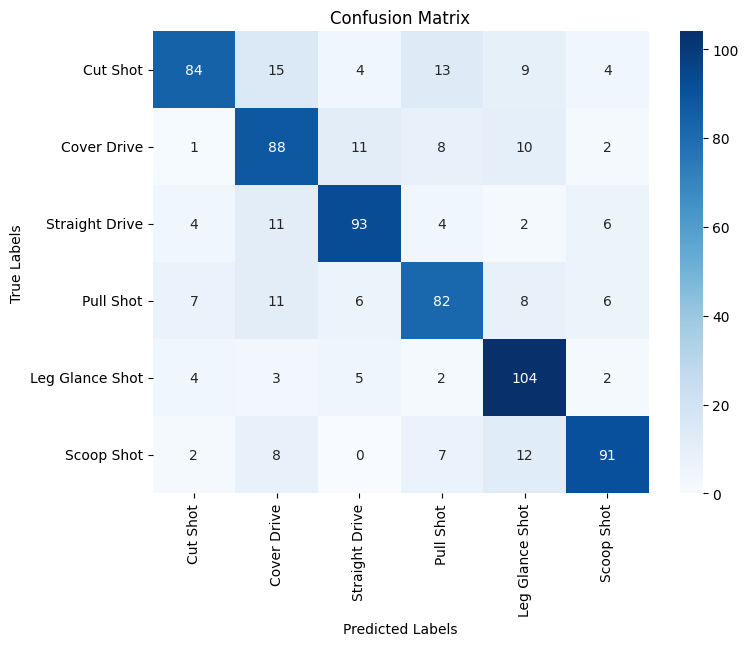

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you already have your predictions (y_pred) and true labels (y_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix in a cleaner format
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [14]:
k_values = range(1,21)  # K values from 1 to 20
accuracy_scores = []


In [16]:
import matplotlib.pyplot as plt

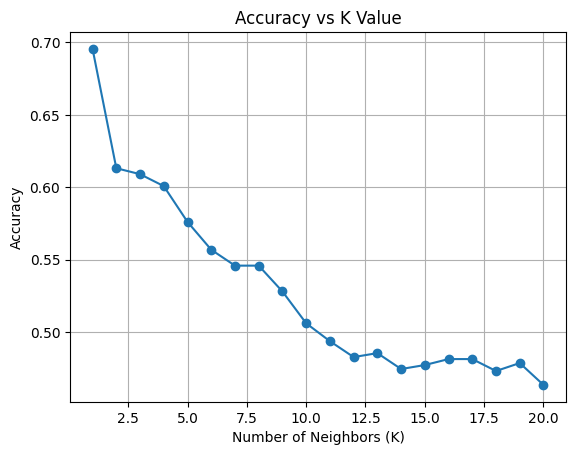

In [18]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

accuracy_scores = []

k_values = range(1, 21)  # From k=1 to k=20

# Loop over different values of k and evaluate the accuracy
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_scores.append(knn.score(X_test, y_test))

# Plot Accuracy vs K Value
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


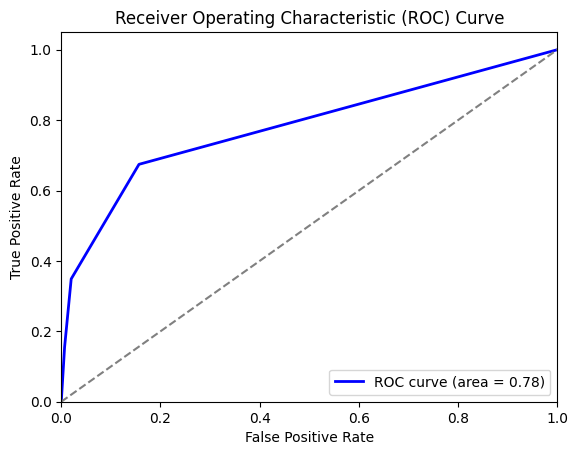

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the value of k
knn_model.fit(X_train, y_train)

# Binarize the labels for multi-class classification (if needed)
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])  # Adjust for your classes

# Predict the probabilities for each class
y_pred_prob = knn_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_bin[:, 0], y_pred_prob[:, 0])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
